# Simple implementation af Kalman filteret
Koden er nu skrevet sådan at $F$ er afhængig af tid, da vores koordinater indgår i dens udregning. Vi skal have nogle anre ligninger i spil for at kunne lave den uden det
<br>
<b>OBS OBS OBS OBS OBS</b> <br>
<b>Læs ovenfor</b>
\begin{align*}
    \intertext{kinematic and observations model}
    \mathbf{x}[n]&=\Phi \mathbf{x}[n-1] + \mathbf{u}[n], \\
    \mathbf{z}[n]&=\mathbf{x}[n] + \mathbf{w}[n],\\
    \intertext{the prediction and prediction mean square error,}
    \hat{\mathbf{x}}[n|n-1]&=\Phi\hat{\mathbf{x}}[n-1|n-1], \\
    M[n|n-1]&=\Phi M[n-1|n-1]\Phi^\top + S_{\mathbf{u}}, \\
    \intertext{the Kalman gain,}
    K[n]&=M[n|n-1](S_{\mathbf{w}}+M[n|n-1])^{-1},\\
    \intertext{and the correction and estimate mean square error,}
    \hat{\mathbf{x}}[n|n]&=\hat{\mathbf{x}}[n|n-1]+K[n](\mathbf{z}[n]-\hat{\mathbf{x}}[n|n-1]),\\
    M[n|n]&=(I-K[n])M[n|n-1].
\end{align*}
<br>

Lav lin. regr. på positionen, og hent hastigheden ud fra det. Så lav vinduer så det kan bruges til live tracking

In [25]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import importlib
from scipy.signal import resample
sys.path.insert(1, os.getcwd())
import tracking as tr
importlib.reload(tr)

<module 'tracking' from '/home/anders/Documents/AAU/P6/tracking/tracking.py'>

In [2]:
detections_name = "snr50/truth1.txt"
entire_name = "snr50/entireOrbit1.txt"

x_state, dt = tr.velocity_algo(detections_name, true_orbit=True)
true_orbit, dt_entire = tr.velocity_algo(entire_name, True)

cov_w, cov_u = [np.eye(6)]*2
x_initial_guess, M_initial_guess = np.ones(6), np.eye(6)
kf = tr.Kalman(cov_u, cov_w, x_initial_guess, M_initial_guess, dt)
kf.run_sim(x_state)

names, vals = kf.get_data()
x, y, z = vals[0][:, 0], vals[0][:, 1], vals[0][:, 2]

In [3]:
time_meas = tr.import_data(detections_name)[0]
time_entire = tr.import_data(entire_name)[0]

n1 = np.where(time_entire == time_meas[0])[0][0]
n2 = np.where(time_entire == time_meas[-1])[0][0]

rx = true_orbit[n1:n2, 0]
ry = true_orbit[n1:n2, 1]
rz = true_orbit[n1:n2, 2]

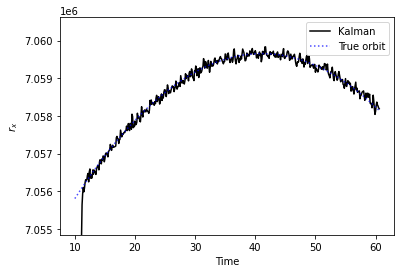

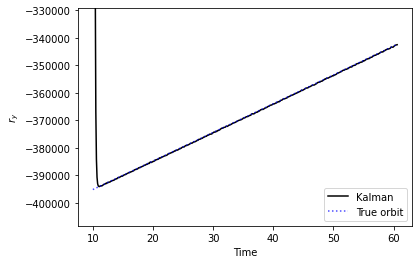

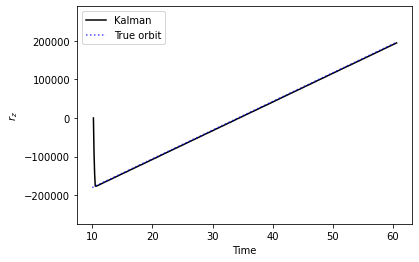

In [27]:
tr.plot_data(vals[0], time_meas, "Kalman", true_orbit, time_entire, "True orbit", 1.5)

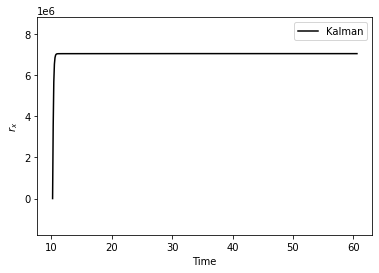

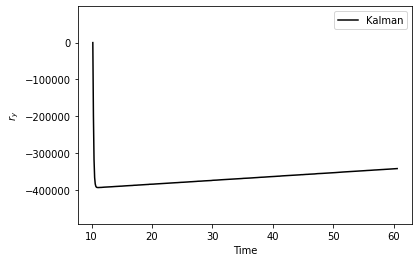

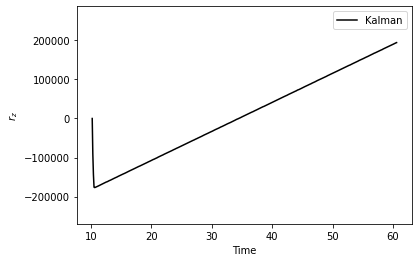

In [28]:
tr.plot_data(vals[0], time_meas, "Kalman", window_size=1.5)

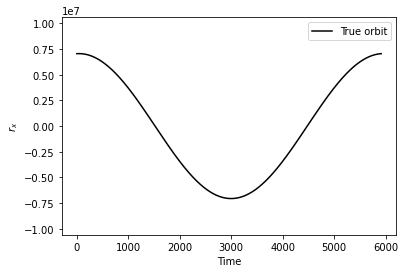

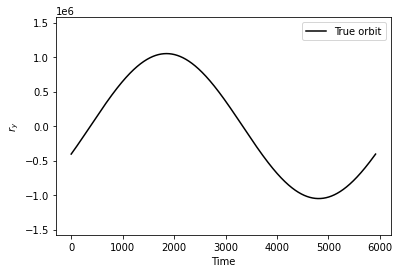

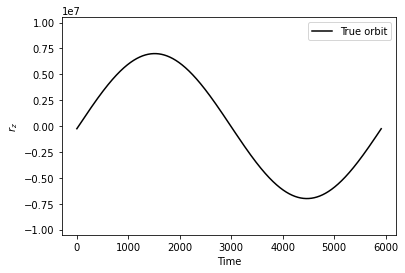

In [29]:
tr.plot_data(true_orbit, time_entire, "True orbit", window_size=1.5)

In [ ]:
plt.title("x")
plt.plot(time_meas[10:-1], x[9:], c='r', label="Kalman")
plt.plot(time_entire[n1:n2], rx, c='k', ls='dotted', label="True Orbit")
plt.legend()
plt.show()

plt.title("y")
plt.plot(time_meas[10:-1], y[9:], c='r', label="Kalman")
plt.plot(time_entire[n1:n2], ry, c='k', ls='dotted', label="True Orbit")
plt.legend()
plt.show()

plt.title("z")
plt.plot(time_meas[10:-1], z[9:], c='r', label="Kalman")
plt.plot(time_entire[n1:n2], rz, c='k', ls='dotted', label="True Orbit")
plt.legend()
plt.show()